In [1]:
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

weather_data_df = pd.DataFrame([])

for y in range(2015,2021):
    weather_url = f'http://spreadtrends.com/api/nfl/games/{y}?format=json'
    weather_results = requests.get(weather_url).json()
    temp_weather_df = pd.json_normalize(weather_results, record_path = ['results'])
    weather_data_df = weather_data_df.append(temp_weather_df)

# create dataframe of the columns we want to analyze

weather_data_df = weather_data_df[['gameId', 'season', 'type','surface', 'temperature', 'conditions', 'windSpeed']]

# filter out all game types other than 'Regular'
#weather_df = weather_df.loc[weather_df['type'] == 'Regular']

weather_data_df.to_csv('data_resources/weather_data.csv')

In [2]:
weather_data_df

,gameId,season,type,surface,temperature,conditions,windSpeed
0,3854,2015,SuperBowl,Grass,76.0,clear sky,16.0
1,3853,2015,Playoff-CONF,Grass,37.0,clear sky,3.5
2,3852,2015,Playoff-CONF,Grass,37.0,mostly cloudy,5.8
3,3849,2015,Playoff-DIV,Grass,37.9,partly cloudy,12.7
4,3850,2015,Playoff-DIV,Grass,46.4,scattered clouds,6.9
...,...,...,...,...,...,...,...
264,4931,2020,Regular,Grass,81.0,clear sky,5.0
265,4932,2020,Regular,Turf-Dome,71.0,partly cloudy,14.0
266,4933,2020,Regular,Turf-Roof,80.0,cloudy,7.0
267,4934,2020,Regular,Turf,70.0,partly cloudy,8.0


In [3]:
# loop through all weeks in the season and create data frame with stats

player_stats_data_df = pd.DataFrame([])

for y in range(2015,2021):
    for x in range(1,18):
        stats_url = f'http://spreadtrends.com/api/nfl/games/{y}/{x}/stats?format=json'
        stats_results = requests.get(stats_url).json()
        temp_df = pd.json_normalize(stats_results, record_path = ['results'])
        player_stats_data_df = player_stats_data_df.append(temp_df)
    
#create a csv file


player_stats_data_df.to_csv('data_resources/player_game_stats.csv')

In [4]:
player_stats_data_df

,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,1,0,7,41,0,0,0,0
1,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,0,...,0,0,0,0,4,13,0,1,7,0
2,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,0,...,0,0,0,0,26,168,2,2,14,0
3,3603,2015,1,Bush,R,RB,25,Vikings,49ers,0,...,0,0,0,0,2,8,0,0,0,0
4,3603,2015,1,McDonald,V,TE,89,Vikings,49ers,0,...,0,0,0,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,5463,2020,17,McKissic,J.D.,WR,30,Eagles,Washington,0,...,0,0,0,0,2,0,0,5,30,0
336,5463,2020,17,Sims,Cam,WR,89,Eagles,Washington,0,...,0,0,0,0,0,0,0,5,43,0
337,5463,2020,17,Sims Jr.,Steven,WR,15,Eagles,Washington,0,...,0,0,0,0,1,18,0,1,6,0
338,5463,2020,17,McLaurin,Terry,WR,17,Eagles,Washington,0,...,0,0,0,0,0,0,0,7,40,1


In [9]:
playerdata = player_stats_data_df.loc[player_stats_data_df["position"] == 'QB']
playerdata = playerdata.loc[playerdata['att'] > 9]
playerdata

,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,1,0,7,41,0,0,0,0
11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,1,1,2,12,4,31,0,0,0,0
22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,2,0,0,0,4,1,0,0,0,0
32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,1,0,0,0,9,39,0,0,0,0
42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,0,1,4,25,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5456,2020,17,Rudolph,Mason,QB,2,Browns,Steelers,39,...,2,1,1,8,1,1,0,0,0,0
303,5459,2020,17,Watson,Deshaun,QB,4,Titans,Texans,39,...,3,1,4,24,3,12,0,0,0,0
312,5459,2020,17,Tannehill,R,QB,17,Texans,Titans,27,...,1,0,2,12,7,38,2,0,0,0
321,5458,2020,17,Cousins,K,QB,12,Lions,Vikings,40,...,3,0,3,22,5,1,1,0,0,0


In [14]:
qbcalc = playerdata[['gameId', 'lastName', 'att', 'comp', 'passYds', 'passTds', 'ints']]
qbcalc

,gameId,lastName,att,comp,passYds,passTds,ints
0,3603,Kaepernick,26,17,165,0,0
11,3590,Cutler,36,18,225,1,1
22,3599,Dalton,34,25,269,2,0
32,3589,Taylor,19,14,195,1,0
42,3598,Manning,40,24,175,0,1
...,...,...,...,...,...,...,...
291,5456,Rudolph,39,22,315,2,1
303,5459,Watson,39,28,365,3,1
312,5459,Tannehill,27,18,216,1,0
321,5458,Cousins,40,28,405,3,0


In [32]:
qbcalc['A']= ((qbcalc['comp'] / qbcalc['att'])-.3)*5
qbcalc['B']= ((qbcalc['passYds'] / qbcalc['att'])-3)*.25
qbcalc['C']= ((qbcalc['passTds'] / qbcalc['att']))*20
qbcalc['D']= (2.375 - ((qbcalc['ints'] / qbcalc['att'])*25))
qbcalc

<ipython-input-32-4d3e45edf450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbcalc['A']= ((qbcalc['comp'] / qbcalc['att'])-.3)*5
<ipython-input-32-4d3e45edf450>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbcalc['B']= ((qbcalc['passYds'] / qbcalc['att'])-3)*.25
<ipython-input-32-4d3e45edf450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,gameId,lastName,att,comp,passYds,passTds,ints,A,B,C,D
0,3603,Kaepernick,26,17,165,0,0,1.769231,0.836538,0.000000,2.375000
11,3590,Cutler,36,18,225,1,1,1.000000,0.812500,0.555556,1.680556
22,3599,Dalton,34,25,269,2,0,2.176471,1.227941,1.176471,2.375000
32,3589,Taylor,19,14,195,1,0,2.184211,1.815789,1.052632,2.375000
42,3598,Manning,40,24,175,0,1,1.500000,0.343750,0.000000,1.750000
...,...,...,...,...,...,...,...,...,...,...,...
291,5456,Rudolph,39,22,315,2,1,1.320513,1.269231,1.025641,1.733974
303,5459,Watson,39,28,365,3,1,2.089744,1.589744,1.538462,1.733974
312,5459,Tannehill,27,18,216,1,0,1.833333,1.250000,0.740741,2.375000
321,5458,Cousins,40,28,405,3,0,2.000000,1.781250,1.500000,2.375000


In [34]:
qbcalc.loc[qbcalc['A'] >2.375, 'A'] = 2.375 
qbcalc.loc[qbcalc['A'] <0, 'A'] = 0 
qbcalc.loc[qbcalc['B'] >2.375, 'B'] = 2.375 
qbcalc.loc[qbcalc['B'] <0, 'B'] = 0 
qbcalc.loc[qbcalc['C'] >2.375, 'C'] = 2.375 
qbcalc.loc[qbcalc['C'] <0, 'C'] = 0 
qbcalc.loc[qbcalc['D'] >2.375, 'D'] = 2.375 
qbcalc.loc[qbcalc['D'] <0, 'D'] = 0 

C:\Users\Dan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Dan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Dan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [50]:
print( f"A min is {qbcalc['A'].min()}")
print( f"A max is {qbcalc['A'].max()}")
print( f"B min is {qbcalc['B'].min()}")
print( f"B max is {qbcalc['B'].max()}")
print( f"C min is {qbcalc['C'].min()}")
print( f"C max is {qbcalc['C'].max()}")
print( f"D min is {qbcalc['D'].min()}")
print( f"D max is {qbcalc['D'].max()}")

A min is 0.0
A max is 2.375
B min is 0.0
B max is 2.375
C min is 0.0
C max is 2.375
D min is 0.0
D max is 2.375


In [36]:
qbcalc.dtypes

gameId        int64
lastName     object
att           int64
comp          int64
passYds       int64
passTds       int64
ints          int64
A           float64
B           float64
C           float64
D           float64
dtype: object

In [38]:
qb_rating = ((qbcalc['A'] + qbcalc['B'] + qbcalc['C'] + qbcalc['D'])/6)*100
qbcalc['QB Rating'] = qb_rating
playerdata['QB Rating'] = qb_rating
playerdata

<ipython-input-38-201ce8d11c42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbcalc['QB Rating'] = qb_rating


,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds,QB Rating
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,1,0,7,41,0,0,0,0,83.012821
11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,1,2,12,4,31,0,0,0,0,67.476852
22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,0,0,0,4,1,0,0,0,0,115.931373
32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,0,0,0,9,39,0,0,0,0,123.793860
42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,1,4,25,1,-1,0,0,0,0,59.895833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5456,2020,17,Rudolph,Mason,QB,2,Browns,Steelers,39,...,1,1,8,1,1,0,0,0,0,89.155983
303,5459,2020,17,Watson,Deshaun,QB,4,Titans,Texans,39,...,1,4,24,3,12,0,0,0,0,115.865385
312,5459,2020,17,Tannehill,R,QB,17,Texans,Titans,27,...,0,2,12,7,38,2,0,0,0,103.317901
321,5458,2020,17,Cousins,K,QB,12,Lions,Vikings,40,...,0,3,22,5,1,1,0,0,0,127.604167


In [51]:
playerdata['QB Rating'].min()

0.0

In [44]:
combined_player_stats_weather_df = playerdata.merge(weather_data_df, how='left', on='gameId')
combined_player_stats_weather_df = combined_player_stats_weather_df.loc[(combined_player_stats_weather_df['surface'] == 'Grass') | (combined_player_stats_weather_df['surface'] == 'Turf')]
combined_player_stats_weather_df.loc[combined_player_stats_weather_df['type'] == 'Regular']
combined_player_stats_weather_df

,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.20
1,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.10
2,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.00
3,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.80
4,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,5455,2020,17,Jackson,Lamar,QB,8,Bengals,Ravens,18,...,0,0,0,90.972222,2020,Regular,Turf,39.0,overcast clouds,14.99
3138,5453,2020,17,Brees,D,QB,9,Panthers,Saints,32,...,0,0,0,116.796875,2020,Regular,Grass,57.0,broken clouds,6.93
3139,5467,2020,17,Wilson,R,QB,3,49ers,Seahawks,36,...,0,0,0,87.847222,2020,Regular,Grass,57.0,broken clouds,4.70
3140,5456,2020,17,Rudolph,Mason,QB,2,Browns,Steelers,39,...,0,0,0,89.155983,2020,Regular,Grass,39.0,overcast clouds,6.93


In [45]:
combined_player_stats_weather_df['surface'].value_counts()

Grass    1642
Turf      676
Name: surface, dtype: int64

Text(0, 0.5, 'QB Rating')

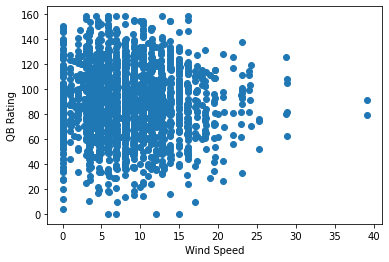

In [47]:
x_axis = combined_player_stats_weather_df['windSpeed']
y_axis = combined_player_stats_weather_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed')
plt.ylabel('QB Rating')

Text(0, 0.5, 'QB Rating')

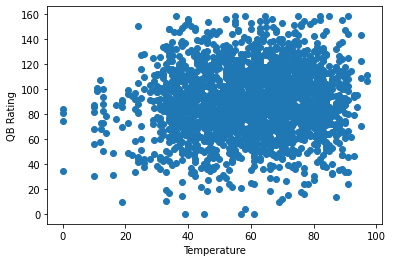

In [48]:
x_axis = combined_player_stats_weather_df['temperature']
y_axis = combined_player_stats_weather_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Temperature')
plt.ylabel('QB Rating')

In [49]:
combined_player_stats_weather_df.to_csv('data_resources/QB Stats and Weather Data.csv')